# Analysis 1 - Metrics Correlations

In [10]:
import pandas as pd
# public/packages/kamala_harris_praises_biden_s_legacy_saying_it_s_unmatched_in_modern_history_shorts/transcription_result.csv
# public/packages/kamala_harris_says_she_s_ready_to_debate_trump_shorts/transcription_result.csv
df = pd.read_csv("public/packages/kamala_harris_praises_biden_s_legacy_saying_it_s_unmatched_in_modern_history_shorts/transcription_result.csv")
df

,Unnamed: 0,segment_id,segment_avg_logprob,segment_compression_ratio,segment_no_speech_prob,seek,start,end,temperature,text,tokens,nltk_opinion_lexicon_positive,nltk_opinion_lexicon_negative,nltk_opinion_lexicon_net,vader_neg,vader_neu,vader_pos,vader_compound
0,0,0,-0.261265,1.634259,0.021252,0,0.000000,5.160000,0.0,I wanted to say a few words about our preside...,"[50364, 286, 1415, 281, 584, 257, 1326, 2283, ...",0.0625,0.0,0.0625,0.000,1.000,0.00,0.0000
1,1,1,-0.261265,1.634259,0.021252,0,5.160000,13.400000,0.0,the past three years is unmatched in modern h...,"[50622, 264, 1791, 1045, 924, 307, 19334, 2410...",0.1250,0.0,0.1250,0.072,0.778,0.15,0.3400
2,2,2,-0.261265,1.634259,0.021252,0,13.400000,24.080000,0.0,"you may clap. In one term, he has already sur...","[51034, 291, 815, 20760, 13, 682, 472, 1433, 1...",0.0000,0.0,0.0000,0.000,1.000,0.00,0.0000
3,3,3,-0.261265,1.634259,0.021252,0,24.080000,29.600000,0.0,have served two terms in office. And I first ...,"[51568, 362, 7584, 732, 2115, 294, 3398, 13, 4...",0.0000,0.0,0.0000,0.000,1.000,0.00,0.0000
4,4,4,-0.225072,1.635417,0.000309,2960,29.600000,35.520000,0.0,Beau. We worked together as attorneys general...,"[50364, 43702, 13, 492, 2732, 1214, 382, 30019...",0.0625,0.0,0.0625,0.000,1.000,0.00,0.0000
5,5,5,-0.225072,1.635417,0.000309,2960,35.520000,43.119999,0.0,tell me stories about his dad. He would talk ...,"[50660, 980, 385, 3676, 466, 702, 3546, 13, 63...",0.0000,0.0,0.0000,0.000,1.000,0.00,0.0000
6,6,6,-0.225072,1.635417,0.000309,2960,43.119999,50.560001,0.0,that Joe Biden is. The qualities that Beau re...,"[51040, 300, 6807, 9877, 307, 13, 440, 16477, ...",0.0000,0.0,0.0000,0.000,0.820,0.18,0.5106
7,7,7,-0.225072,1.635417,0.000309,2960,50.560001,53.840000,0.0,that I have seen every day in our president.,"[51412, 300, 286, 362, 1612, 633, 786, 294, 52...",0.0000,0.0,0.0000,0.000,1.000,0.00,0.0000


In [11]:
def compute_z_scores_and_correlations(df, columns):
    for column in columns:
        df[f'{column}_z'] = (df[column] - df[column].mean()) / df[column].std()
        
    z_columns = [f'{col}_z' for col in columns]
    correlation_matrix = df[z_columns].corr()
    return df, correlation_matrix

In [12]:
metrics = ['nltk_opinion_lexicon_net', 'vader_neg', 
           'vader_neu', 'vader_pos', 'vader_compound','openai_mean_sentiment']

df, correlation_matrix = compute_z_scores_and_correlations(df, metrics)

In [13]:
# Create network plot using corrplot
import matplotlib.pyplot as plt
import seaborn as sns

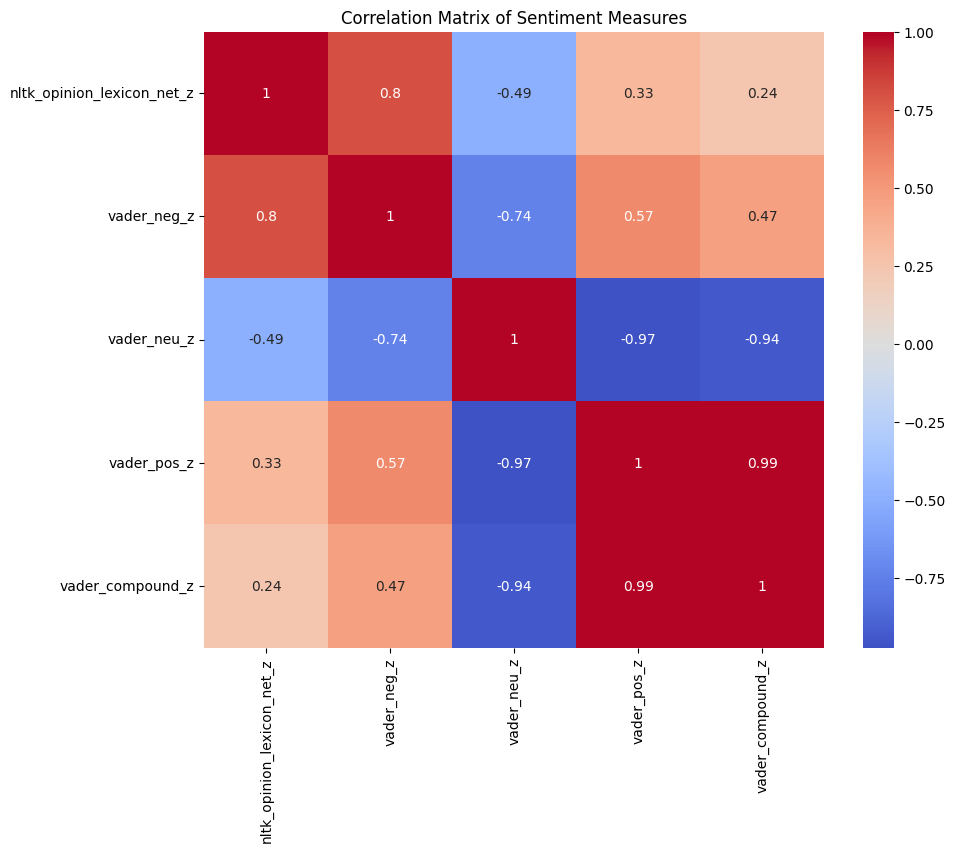

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sentiment Measures')
plt.show()

# Save high-resolution correlation matrix plot
plt.savefig("correlation_matrix.png", dpi=300)

# Save corrplot
plt.savefig("correlation_matrix_corrplot.png", dpi=300)

# Analysis 2: Semantic Data Analysis

In [16]:
df['text']

0     I wanted to say a few words about our preside...
1     the past three years is unmatched in modern h...
2     you may clap. In one term, he has already sur...
3     have served two terms in office. And I first ...
4     Beau. We worked together as attorneys general...
5     tell me stories about his dad. He would talk ...
6     that Joe Biden is. The qualities that Beau re...
7         that I have seen every day in our president.
Name: text, dtype: object

In [18]:
# import json
# import pandas as pd
# from openai import OpenAI
# from tqdm import tqdm
# import time

# # Set up OpenAI client
# api_key = "sk-proj-4LbQ2lqaXi5zLWAjZIp5T3BlbkFJkMGFDil8L6yKmTvqTIDO"  # Replace with your actual OpenAI API key
# client = OpenAI(api_key=api_key)
# def get_sentiment(text):
#     try:
#         response = client.chat.completions.create(
#             model="gpt-3.5-turbo",
#             messages=[
#                 {"role": "system", "content": "You are an assistant that only responds in valid JSON format. Your task is to provide sentiment analysis and present the results, model into a specific JSON structure."},
#                 {"role": "user", "content": f"Help me to get the sentiment analysis of the text from 1-10 into JSON files without any ''' json ''' that is not in the string format, where the text is stored in a variable called text: {text}"}
#             ]
#         )

#         # Parse the JSON content
#         sentiment_data = json.loads(response) # .choices[0].message.content
#         return sentiment_data

#     except Exception as e:
#         print(f"Error processing text: {text[:50]}... Error: {str(e)}")
#         return None

# # Function to apply sentiment analysis with rate limiting
# def apply_sentiment_analysis(df):
#     results = []
#     for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing"):
#         sentiment = get_sentiment(row['text'])
#         results.append(sentiment)
#         time.sleep(1)  # Rate limiting: wait 1 second between requests
#     return results

# # Apply the sentiment analysis
# df['sentiment'] = apply_sentiment_analysis(df['text'])
# # Display the results
# df['sentiment'] 

AttributeError: 'Series' object has no attribute 'iterrows'

In [19]:
import json
import pandas as pd
from openai import OpenAI
from tqdm import tqdm
import time

# Set up OpenAI client
api_key = "sk-proj-4LbQ2lqaXi5zLWAjZIp5T3BlbkFJkMGFDil8L6yKmTvqTIDO"  # Replace with your actual OpenAI API key
client = OpenAI(api_key=api_key)

def get_sentiment(text):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are an assistant that only responds in valid JSON format. Your task is to provide sentiment analysis and present the results, model into a specific JSON structure."},
                {"role": "user", "content": f"Help me to get the sentiment analysis of the text from 1-10 into JSON files without any ''' json ''' that is not in the string format, where the text is stored in a variable called text: {text}"}
            ]
        )

        # Extract the content from the response
        content = response.choices[0].message.content

        # Parse the JSON content
        sentiment_data = json.loads(content)
        return sentiment_data

    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {str(e)}")
        return None

# Function to apply sentiment analysis with rate limiting
def apply_sentiment_analysis(df):
    results = []
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing"):
        sentiment = get_sentiment(row['text'])
        results.append(sentiment)
        time.sleep(1)  # Rate limiting: wait 1 second between requests
    return results

# Assuming df is your DataFrame with a 'text' column
# Apply the sentiment analysis
df['sentiment'] = apply_sentiment_analysis(df)

# Display the results
df['sentiment']

Processing: 100%|██████████| 8/8 [00:17<00:00,  2.24s/it]


0    {'sentiment_analysis': {'text': 'I wanted to s...
1    {'sentiment_analysis': {'text': 'the past thre...
2    {'sentiment_analysis': {'text': 'you may clap....
3    {'sentiment_analysis': {'text': 'I have served...
4    {'sentiment_analysis': {'text': 'Beau. We work...
5    {'sentiment_analysis': {'text': 'tell me stori...
6    {'sentiment_analysis': {'text': 'that Joe Bide...
7    {'sentiment_analysis': {'text': 'that I have s...
Name: sentiment, dtype: object

In [37]:
for i in range(len(df)):
    output = df['sentiment'][i]['sentiment_analysis']['sentiment_score']
    print(output)

7
9.2
7
7
8
7
7.5
3


In [38]:
import json
import pandas as pd
from openai import OpenAI
from tqdm import tqdm
import time

# Set up OpenAI client
api_key = "sk-proj-4LbQ2lqaXi5zLWAjZIp5T3BlbkFJkMGFDil8L6yKmTvqTIDO"  # Replace with your actual OpenAI API key
client = OpenAI(api_key=api_key)

def get_sentiment(text):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are an assistant that only responds in valid JSON format. Your task is to provide sentiment analysis and present the results, model into a specific JSON structure."},
                {"role": "user", "content": f"Help me to get the sentiment analysis of the text from 1-10 into JSON files without any ''' json ''' that is not in the string format, where the text is stored in a variable called text: {text}"}
            ]
        )

        # Extract the content from the response
        content = response.choices[0].message.content

        # Parse the JSON content
        sentiment_data = json.loads(content)
        return sentiment_data

    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {str(e)}")
        return None

# Function to apply sentiment analysis with rate limiting and iteration
def apply_sentiment_analysis(df):
    results = []
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing"):
        sentiment_list = []
        for _ in range(5):  # Iterate 5 times for each text
            sentiment = get_sentiment(row['text'])
            sentiment_list.append(sentiment)
            time.sleep(1)  # Rate limiting: wait 1 second between requests
        results.append(sentiment_list)
    return results

# # Function to apply sentiment analysis with rate limiting and iteration
# def apply_sentiment_analysis(df):
#     results = []
#     for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing"):
#         sentiment_list = []
#         for _ in range(5):  # Iterate 5 times for each text
#             sentiment = get_sentiment(row['text'])
#             sentiment_list.append(sentiment)
#             time.sleep(1)  # Rate limiting: wait 1 second between requests
#         results.append(sentiment_list)
#     return results

# Function to apply sentiment analysis with rate limiting and iteration
def apply_sentiment_analysis(df):
    results = []
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing"):
        sentiment_list = []
        for _ in range(5):  # Iterate 5 times for each text
            sentiment = get_sentiment(row['text'])
            sentiment_list.append(sentiment)
            time.sleep(1)  # Rate limiting: wait 1 second between requests
        results.append(sentiment_list)
    return results

# Assuming df is your DataFrame with a 'text' column
# Apply the sentiment analysis
df['sentiment_iterate'] = apply_sentiment_analysis(df)

# Display the results
print(df['sentiment_iterate'])

Processing: 100%|██████████| 8/8 [01:35<00:00, 11.97s/it]

0    [{'sentiment_analysis': {'text': 'I wanted to ...
1    [{'sentiment_analysis': {'text': 'the past thr...
2    [{'sentiment_analysis': {'text': 'you may clap...
3    [{'sentiment_analysis': {'text': 'I have serve...
4    [{'sentiment_analysis': {'text': 'Beau. We wor...
5    [{'sentiment_analysis': {'text': 'tell me stor...
6    [{'sentiment_analysis': {'text': 'that Joe Bid...
7    [{'sentiment_analysis': {'text': 'that I have ...
Name: sentiment_iterate, dtype: object


In [39]:
df['sentiment_iterate'][0]

[{'sentiment_analysis': {'text': "I wanted to say a few words about our president. Joe Biden's legacy of accomplishment over",
   'sentiment_score': 7}},
 {'sentiment_analysis': {'text': "I wanted to say a few words about our president. Joe Biden's legacy of accomplishment over",
   'sentiment_score': 7}},
 {'sentiment_analysis': {'text': "I wanted to say a few words about our president. Joe Biden's legacy of accomplishment over",
   'sentiment_score': 7}},
 {'sentiment_analysis': {'text': "I wanted to say a few words about our president. Joe Biden's legacy of accomplishment",
   'sentiment_score': 7.5,
   'sentiment': 'Positive'}},
 {'sentiment_analysis': {'text': "I wanted to say a few words about our president. Joe Biden's legacy of accomplishment over",
   'sentiment_score': 7}}]

In [54]:
# def extract_sentiment_scores(sentiment_list):
#     return [item['sentiment_analysis']['sentiment_score'] for item in sentiment_list if 'sentiment_analysis' in item and 'sentiment_score' in item['sentiment_analysis']]

def extract_sentiment_scores(sentiment_list):
    scores = []
    for item in sentiment_list:
        if 'sentiment_analysis' in item and 'sentiment_score' in item['sentiment_analysis']:
            scores.append(item['sentiment_analysis']['sentiment_score'])
        elif 'sentiment' in item and 'sentiment_score' in item['sentiment']:
            scores.append(item['sentiment']['sentiment_score'])
        elif 'sentiment_score' in item:
            scores.append(item['sentiment_score'])
        elif 'sentiment' in item and 'overall_score' in item['sentiment']:
            scores.append(float(item['sentiment']['overall_score']))
        else:
            scores.append(None)  # Append None if no score is found
    return scores
    # return [item['sentiment_analysis']['sentiment_score'] for item in sentiment_list if 'sentiment_analysis' in item and 'sentiment_score' in item['sentiment_analysis']]

# Apply to a single row
scores = extract_sentiment_scores(df['sentiment_iterate'][0])
print(scores)

# Apply to the entire DataFrame
df['sentiment_scores'] = df['sentiment_iterate'].apply(extract_sentiment_scores)
df['sentiment_scores']

[7, 7, 7, 7.5, 7]


0        [7, 7, 7, 7.5, 7]
1          [9, 9, 9, 9, 9]
2          [7, 8, 8, 8, 7]
3    [5.4, 7, 4.5, 7, 7.5]
4        [8, 7, 7.0, 7, 7]
5        [8, 7.5, 6, 6, 7]
6        [8, 7.5, 8, 7, 7]
7    [3.5, 1, 4.5, 3, 3.2]
Name: sentiment_scores, dtype: object

In [58]:
import numpy as np

def convert_list_to_float(score_list):
    return [float(score) for score in score_list]

# Apply the conversion to the entire column
df['sentiment_scores_number'] = df['sentiment_scores'].apply(convert_list_to_float)
# Calculate mean and std for each row
df['mean_sentiment'] = df['sentiment_scores_number'].apply(np.mean)/10
df['std_sentiment'] = df['sentiment_scores_number'].apply(np.std)/10

# Calculate overall mean and std
overall_mean = df['mean_sentiment'].mean()
overall_std = df['std_sentiment'].mean()

print(f"Overall Mean of sentiment scores: {overall_mean:.2f}")
print(f"Overall Standard Deviation of sentiment scores: {overall_std:.2f}")

# If you want the std of all scores combined (not averaged per row)
all_scores = [score for scores in df['sentiment_scores'] for score in scores]
combined_std = np.std(all_scores)/10
print(f"Combined Standard Deviation of all scores: {combined_std:.2f}")

Overall Mean of sentiment scores: 0.68
Overall Standard Deviation of sentiment scores: 0.06
Combined Standard Deviation of all scores: 0.18


In [59]:
df['mean_sentiment'], df['std_sentiment']

(0    0.710
 1    0.900
 2    0.760
 3    0.628
 4    0.720
 5    0.690
 6    0.750
 7    0.304
 Name: mean_sentiment, dtype: float64,
 0    0.020000
 1    0.000000
 2    0.048990
 3    0.113737
 4    0.040000
 5    0.080000
 6    0.044721
 7    0.114298
 Name: std_sentiment, dtype: float64)

In [51]:
df['sentiment_iterate'][7]

[{'sentiment_analysis': {'text': 'that I have seen every day in our president.',
   'sentiment_score': 3.5,
   'sentiment_category': 'Neutral'}},
 {'sentiment_analysis': {'text': 'that I have seen every day in our president.',
   'sentiment_score': 1}},
 {'sentiment_analysis': {'text': 'that I have seen every day in our president.',
   'sentiment_score': 4.5,
   'sentiment': 'Neutral'}},
 {'sentiment_analysis': {'text': 'that I have seen every day in our president.',
   'sentiment_score': 3}},
 {'text': 'that I have seen every day in our president.',
  'sentiment_score': 3.2,
  'sentiment_label': 'Neutral'}]

In [53]:
df['sentiment_iterate'][7][-1]['sentiment_score']

3.2

In [45]:
df['sentiment_iterate'][4][2]['sentiment']['overall_score']

'7'

In [48]:
df['len_sentiment'] = df['sentiment_scores'].apply(len)
df['len_sentiment']

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
Name: len_sentiment, dtype: int64

# Analysis 3: Complete Metric Correlations and Semantic Data Analysis

In [1]:
# Create network plot using corrplot
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import numpy as np
from openai import OpenAI
from tqdm import tqdm
import time

import pandas as pd
# public/packages/kamala_harris_praises_biden_s_legacy_saying_it_s_unmatched_in_modern_history_shorts/transcription_result.csv
# public/packages/kamala_harris_says_she_s_ready_to_debate_trump_shorts/transcription_result.csv
df = pd.read_csv("public/packages/shots_fired_at_trump_rally/transcription_result.csv")
df

# Set up OpenAI client
api_key = "sk-proj-4LbQ2lqaXi5zLWAjZIp5T3BlbkFJkMGFDil8L6yKmTvqTIDO"  # Replace with your actual OpenAI API key
client = OpenAI(api_key=api_key)

def get_sentiment(text):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are an assistant that only responds in valid JSON format. Your task is to provide sentiment analysis and present the results, model into a specific JSON structure."},
                {"role": "user", "content": f"Help me to get the sentiment analysis of the text from 1-10 into JSON files without any ''' json ''' that is not in the string format, where the text is stored in a variable called text: {text}"}
            ]
        )

        # Extract the content from the response
        content = response.choices[0].message.content

        # Parse the JSON content
        sentiment_data = json.loads(content)
        return sentiment_data

    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {str(e)}")
        return None

# Function to apply sentiment analysis with rate limiting and iteration
def apply_sentiment_analysis(df):
    results = []
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing"):
        sentiment_list = []
        for _ in range(5):  # Iterate 5 times for each text
            sentiment = get_sentiment(row['text'])
            sentiment_list.append(sentiment)
            time.sleep(1)  # Rate limiting: wait 1 second between requests
        results.append(sentiment_list)
    return results

def convert_list_to_float(score_list):
    return [float(score) for score in score_list]

# Assuming df is your DataFrame with a 'text' column
# Apply the sentiment analysis
df['sentiment_iterate'] = apply_sentiment_analysis(df)

# def extract_sentiment_scores(sentiment_list):
#     scores = []
#     for item in sentiment_list:
#         if 'sentiment_analysis' in item and 'sentiment_score' in item['sentiment_analysis']:
#             scores.append(item['sentiment_analysis']['sentiment_score'])
#         elif 'sentiment_analysis' in item and 'overall_sentiment' in item['sentiment_analysis']:
#             scores.append(item['sentiment_analysis']['overall_sentiment'])
#         elif 'sentiment_analysis' in item and 'score' in item['sentiment_analysis']:
#             scores.append(item['sentiment_analysis']['score'])
#         elif 'sentiment' in item and 'subjectivity_confidence' in item['sentiment']:
#             scores.append(item['sentiment']['subjectivity_confidence']*10)
#         elif 'sentiment' in item and 'score' in item['sentiment']:
#             scores.append(item['sentiment']['score'])
#         elif 'sentiment' in item and 'positive' in item['sentiment']:
#             scores.append(item['sentiment']['positive'])
#         elif 'sentiment' in item and 'overall' in item['sentiment']:
#             scores.append(item['sentiment']['overall'])
#         elif 'sentiment' in item and 'sentiment_score' in item['sentiment']:
#             scores.append(item['sentiment']['sentiment_score'])
#         elif 'sentiment_score' in item:
#             scores.append(item['sentiment_score'])
#         elif 'sentiment' in item and 'overall_score' in item['sentiment']:
#             scores.append(float(item['sentiment']['overall_score']))
#         else:
#             scores.append(None)  # Append None if no score is found
#     return scores



Processing: 100%|██████████| 36/36 [06:14<00:00, 10.41s/it]


TypeError: string indices must be integers

In [8]:
def extract_sentiment_scores(sentiment_list):
    scores = []
    for item in sentiment_list:
        try:
            if 'sentiment_analysis' in item and 'sentiment_score' in item['sentiment_analysis']:
                scores.append(item['sentiment_analysis']['sentiment_score'])
            elif 'sentiment_analysis' in item and 'overall_sentiment' in item['sentiment_analysis']:
                scores.append(item['sentiment_analysis']['overall_sentiment'])
            elif 'sentiment_analysis' in item and 'score' in item['sentiment_analysis']:
                scores.append(item['sentiment_analysis']['score'])
            elif 'sentiment' in item and 'subjectivity_confidence' in item['sentiment']:
                scores.append(item['sentiment']['subjectivity_confidence'] * 10)
            elif 'sentiment' in item and 'score' in item['sentiment']:
                scores.append(item['sentiment']['score'])
            elif 'sentiment' in item and 'positive' in item['sentiment']:
                scores.append(item['sentiment']['positive'])
            elif 'sentiment' in item and 'overall' in item['sentiment']:
                scores.append(item['sentiment']['overall'])
            elif 'sentiment' in item and 'sentiment_score' in item['sentiment']:
                scores.append(item['sentiment']['sentiment_score'])
            elif 'sentiment_score' in item:
                scores.append(item['sentiment_score'])
            elif 'sentiment' in item and 'overall_score' in item['sentiment']:
                scores.append(float(item['sentiment']['overall_score']))
            else:
                scores.append(None)  # Append None if no score is found
        except (KeyError, TypeError, ValueError):
            scores.append(None)  # Append None in case of any exception
    
    
    return scores


df['sentiment_iterate'] = apply_sentiment_analysis(df)

# Apply the function to the DataFrame
df['sentiment_scores'] = df['sentiment_iterate'].apply(extract_sentiment_scores)
df['sentiment_scores']

0         [7, 6, 6.8, 5, 7.5]
1       [3, 3.5, 3, 3.8, 5.6]
2          [7, None, 5, 7, 7]
3             [1, 2, 1, 1, 1]
4     [3.5, 3.2, 3.5, 3, 3.7]
5         [1, 4.5, 4.5, 3, 5]
6           [2, 1, 2, 1, 1.4]
7       [3, 4, 3.5, 4.5, 4.5]
8     [None, -5, -6, 3, -4.2]
9       [3.5, 8.5, 8, 4.5, 3]
10       [3, 3, -0.2, 4.2, 3]
11      [None, -0.1, 6, 6, 7]
12            [7, 7, 7, 8, 6]
13          [4.5, 3, 4, 3, 3]
14            [7, 5, 5, 5, 5]
15        [7.5, 8, 8, 8, 7.5]
16          [7, 5, 5.5, 7, 7]
17         [3, 2.5, 3, 3, -4]
18          [8, 7, 8, 8.5, 7]
19     [7.5, 8.5, 8, 7, None]
20        [3, 4, 3.5, 3, 7.5]
21       [0.75, 5, 7, 9.5, 3]
22         [8, None, 8, 9, 8]
23         [None, 8, 9, 8, 8]
24            [7, 5, 7, 8, 7]
25            [5, 5, 8, 8, 5]
26          [5, 7, 5, 4.5, 4]
27          [1.0, 2, 2, 2, 2]
28            [8, 8, 8, 8, 8]
29         [7, 7, 7, None, 6]
30    [5, neutral, 7.5, 7, 7]
31    [3.5, -0.4, 2, 3, -0.3]
32         [7, 7, 8, None, 7]
33        

In [7]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Updated function to replace None with the mean of the list
# def extract_sentiment_scores(sentiment_list):
#     scores = []
#     for item in sentiment_list:
#         try:
#             if 'sentiment_analysis' in item and 'sentiment_score' in item['sentiment_analysis']:
#                 scores.append(item['sentiment_analysis']['sentiment_score'])
#             elif 'sentiment_analysis' in item and 'overall_sentiment' in item['sentiment_analysis']:
#                 scores.append(item['sentiment_analysis']['overall_sentiment'])
#             elif 'sentiment_analysis' in item and 'score' in item['sentiment_analysis']:
#                 scores.append(item['sentiment_analysis']['score'])
#             elif 'sentiment' in item and 'subjectivity_confidence' in item['sentiment']:
#                 scores.append(item['sentiment']['subjectivity_confidence'] * 10)
#             elif 'sentiment' in item and 'score' in item['sentiment']:
#                 scores.append(item['sentiment']['score'])
#             elif 'sentiment' in item and 'positive' in item['sentiment']:
#                 scores.append(item['sentiment']['positive'])
#             elif 'sentiment' in item and 'overall' in item['sentiment']:
#                 scores.append(item['sentiment']['overall'])
#             elif 'sentiment' in item and 'sentiment_score' in item['sentiment']:
#                 scores.append(item['sentiment']['sentiment_score'])
#             elif 'sentiment_score' in item:
#                 scores.append(item['sentiment_score'])
#             elif 'sentiment' in item and 'overall_score' in item['sentiment']:
#                 scores.append(float(item['sentiment']['overall_score']))
#             else:
#                 scores.append(None)  # Append None if no score is found
#         except (KeyError, TypeError, ValueError):
#             scores.append(None)  # Append None in case of any exception
    
#     # Replace None with the mean of the list (ignoring None values)
#     if any(score is not None for score in scores):
#         mean_value = np.nanmean([score for score in scores if score is not None])
#         scores = [score if score is not None else mean_value for score in scores]
#     return scores

# # Apply the extraction function to the DataFrame
# df['sentiment_scores'] = df['sentiment_iterate'].apply(extract_sentiment_scores)

# # Convert the list elements to floats
# def convert_list_to_float(score_list):
#     return [float(score) for score in score_list]

# # Apply the conversion to the entire column
# df['sentiment_scores_number'] = df['sentiment_scores'].apply(convert_list_to_float)

# # Calculate mean and std for each row, and scale by dividing by 10
# df['openai_mean_sentiment'] = df['sentiment_scores_number'].apply(np.mean) / 10
# df['std_sentiment'] = df['sentiment_scores_number'].apply(np.std) / 10

# # Calculate overall mean and std
# overall_mean = df['openai_mean_sentiment'].mean()
# overall_std = df['std_sentiment'].mean()

# print(f"Overall Mean of sentiment scores: {overall_mean:.2f}")
# print(f"Overall Standard Deviation of sentiment scores: {overall_std:.2f}")

# # If you want the std of all scores combined (not averaged per row)
# all_scores = [score for scores in df['sentiment_scores'] for score in scores]
# combined_std = np.std(all_scores) / 10
# print(f"Combined Standard Deviation of all scores: {combined_std:.2f}")

# # Function to compute z-scores and correlations
# def compute_z_scores_and_correlations(df, columns):
#     for column in columns:
#         df[f'{column}_z'] = (df[column] - df[column].mean()) / df[column].std()
        
#     z_columns = [f'{col}_z' for col in columns]
#     correlation_matrix = df[z_columns].corr()
#     return df, correlation_matrix

# # Define metrics to be analyzed
# metrics = ['nltk_opinion_lexicon_net', 'vader_neg', 
#            'vader_neu', 'vader_pos', 'vader_compound', 'openai_mean_sentiment']

# # Compute z-scores and correlation matrix
# df, correlation_matrix = compute_z_scores_and_correlations(df, metrics)

# # Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix of Sentiment Measures')
# plt.show()

# # Save high-resolution correlation matrix plot
# plt.savefig("correlation_matrix.png", dpi=300)
# plt.savefig("correlation_matrix_corrplot.png", dpi=300)


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None

In [4]:
# # Apply to the entire DataFrame
# df['sentiment_scores'] = df['sentiment_iterate'].apply(extract_sentiment_scores)
# df['sentiment_scores']

TypeError: string indices must be integers

In [2]:
df['sentiment_iterate'] 

0     [{'sentiment_analysis': {'text': 'And that com...
1     [{'sentiment_analysis': {'text': 'comes right ...
2     [{'sentiment_analysis': {'text': 'Take a look ...
3     [{'sentiment_analysis': {'text': 'So that arro...
4     [{'sentiment_analysis': {'text': 'of illegal i...
5     [{'text': 'into our country.', 'sentiment': {'...
6     [{'sentiment_analysis': {'text': 'And then, an...
7     [{'sentiment_analysis': {'text': 'in the histo...
8     [{'text': 'And look what happened to our count...
9     [{'sentiment_analysis': {'text': 'Probably 20 ...
10    [{'text': 'And, you know, that's a little bit ...
11    [{'text': 'That chart's a couple of months old...
12    [{'sentiment_analysis': {'text': 'And if you w...
13    [{'sentiment_analysis': {'text': 'take a look ...
14    [{'sentiment_analysis': {'text': 'Okay', 'scor...
15    [{'text': 'We are watching live at a rally in ...
16    [{'sentiment_analysis': {'text': 'Former Presi...
17    [{'sentiment_analysis': {'text': 'There ha

In [3]:
df['sentiment_iterate'][0]

[{'sentiment_analysis': {'text': 'And that comes right from the government services',
   'sentiment_score': 7}},
 {'sentiment_analysis': {'text': 'And that comes right from the government services',
   'sentiment_score': 6}},
 {'sentiment_analysis': {'text': 'And that comes right from the government services',
   'sentiment_score': 6.8,
   'sentiment': 'Neutral'}},
 {'sentiment_analysis': {'text': 'And that comes right from the government services',
   'sentiment_score': 5}},
 {'sentiment_analysis': {'text': 'And that comes right from the government services',
   'sentiment_score': 7.5,
   'sentiment_label': 'Positive'}}]

Overall Mean of sentiment scores: 0.51
Overall Standard Deviation of sentiment scores: 0.11
Combined Standard Deviation of all scores: 0.29


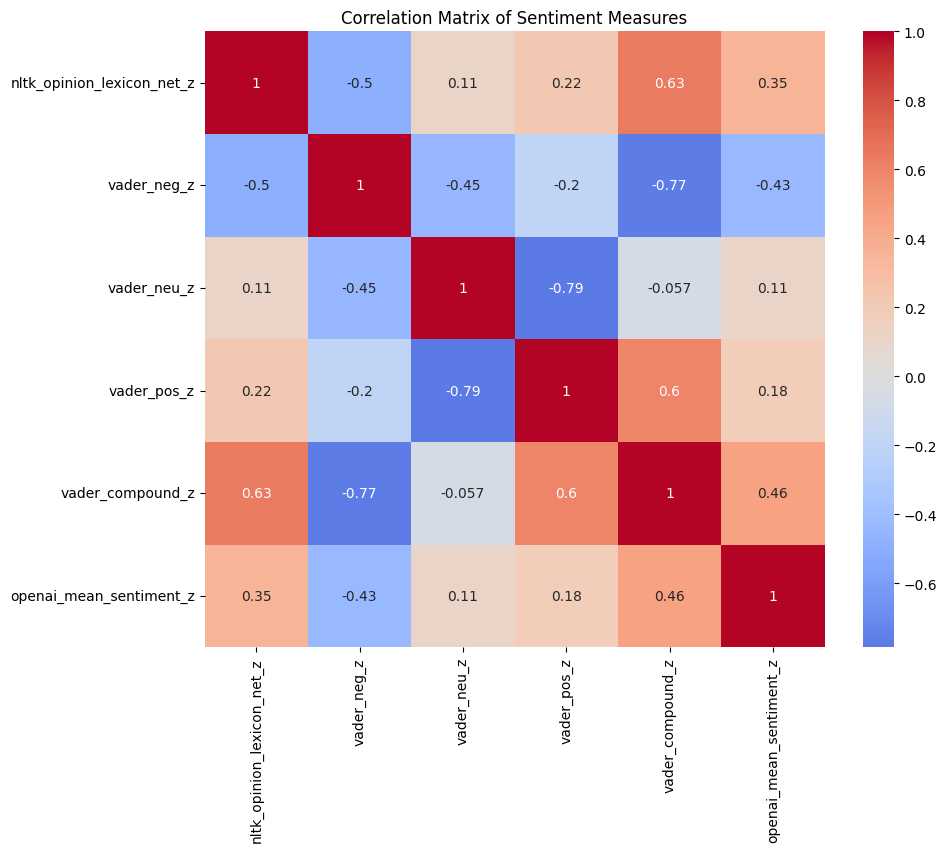

<Figure size 640x480 with 0 Axes>

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert the list to floats, ignoring None and non-integer/float values
def convert_list_to_float(score_list):
    return [float(score) for score in score_list if isinstance(score, (int, float)) and not np.isnan(score)]

# Apply the conversion to the entire column
df['sentiment_scores_number'] = df['sentiment_scores'].apply(convert_list_to_float)

# Calculate mean and std for each row, ignoring empty lists
df['openai_mean_sentiment'] = df['sentiment_scores_number'].apply(lambda x: np.mean(x) if x else None) / 10
df['std_sentiment'] = df['sentiment_scores_number'].apply(lambda x: np.std(x) if x else None) / 10

# Calculate overall mean and std (ignoring None in the DataFrame)
overall_mean = df['openai_mean_sentiment'].mean()
overall_std = df['std_sentiment'].mean()

print(f"Overall Mean of sentiment scores: {overall_mean:.2f}")
print(f"Overall Standard Deviation of sentiment scores: {overall_std:.2f}")

# If you want the std of all scores combined (not averaged per row)
all_scores = [score for scores in df['sentiment_scores_number'] for score in scores]
combined_std = np.std(all_scores) / 10
print(f"Combined Standard Deviation of all scores: {combined_std:.2f}")

# Function to compute z-scores and correlations
def compute_z_scores_and_correlations(df, columns):
    for column in columns:
        df[f'{column}_z'] = (df[column] - df[column].mean()) / df[column].std()
        
    z_columns = [f'{col}_z' for col in columns]
    correlation_matrix = df[z_columns].corr()
    return df, correlation_matrix

# Define metrics to be analyzed
metrics = ['nltk_opinion_lexicon_net', 'vader_neg', 
           'vader_neu', 'vader_pos', 'vader_compound', 'openai_mean_sentiment']

# Compute z-scores and correlation matrix
df, correlation_matrix = compute_z_scores_and_correlations(df, metrics)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sentiment Measures')
plt.show()

# Save high-resolution correlation matrix plot
plt.savefig("correlation_matrix.png", dpi=300)
plt.savefig("correlation_matrix_corrplot.png", dpi=300)


In [11]:
df.to_csv('final_data.csv')

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert the list to floats, ignoring None values
def convert_list_to_float(score_list):
    return [float(score) for score in score_list if score is not None]

# Apply the conversion to the entire column
df['sentiment_scores_number'] = df['sentiment_scores'].apply(convert_list_to_float)

# Calculate mean and std for each row (ignoring None)
df['openai_mean_sentiment'] = df['sentiment_scores_number'].apply(lambda x: np.mean(x) if x else None) / 10
df['std_sentiment'] = df['sentiment_scores_number'].apply(lambda x: np.std(x) if x else None) / 10

# Calculate overall mean and std (ignoring None in the DataFrame)
overall_mean = df['openai_mean_sentiment'].mean()
overall_std = df['std_sentiment'].mean()

print(f"Overall Mean of sentiment scores: {overall_mean:.2f}")
print(f"Overall Standard Deviation of sentiment scores: {overall_std:.2f}")

# If you want the std of all scores combined (not averaged per row)
all_scores = [score for scores in df['sentiment_scores_number'] for score in scores]
combined_std = np.std(all_scores) / 10
print(f"Combined Standard Deviation of all scores: {combined_std:.2f}")

# Function to compute z-scores and correlations
def compute_z_scores_and_correlations(df, columns):
    for column in columns:
        df[f'{column}_z'] = (df[column] - df[column].mean()) / df[column].std()
        
    z_columns = [f'{col}_z' for col in columns]
    correlation_matrix = df[z_columns].corr()
    return df, correlation_matrix

# Define metrics to be analyzed
metrics = ['nltk_opinion_lexicon_net', 'vader_neg', 
           'vader_neu', 'vader_pos', 'vader_compound', 'openai_mean_sentiment']

# Compute z-scores and correlation matrix
df, correlation_matrix = compute_z_scores_and_correlations(df, metrics)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sentiment Measures')
plt.show()

# Save high-resolution correlation matrix plot
plt.savefig("correlation_matrix.png", dpi=300)
plt.savefig("correlation_matrix_corrplot.png", dpi=300)


ValueError: could not convert string to float: 'neutral'

Overall Mean of sentiment scores: 0.67
Overall Standard Deviation of sentiment scores: 0.06
Combined Standard Deviation of all scores: 0.18


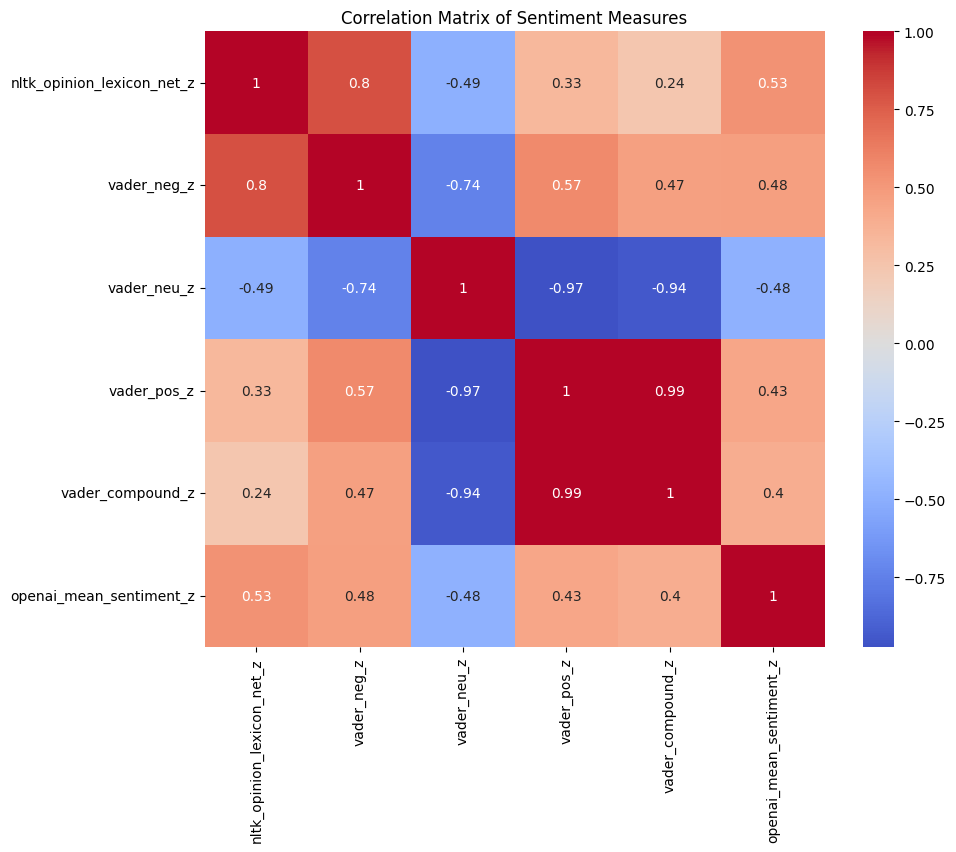

<Figure size 640x480 with 0 Axes>

In [116]:
# Apply the conversion to the entire column
df['sentiment_scores_number'] = df['sentiment_scores'].apply(convert_list_to_float)
# Calculate mean and std for each row
df['openai_mean_sentiment'] = df['sentiment_scores_number'].apply(np.mean)/10
df['std_sentiment'] = df['sentiment_scores_number'].apply(np.std)/10

# Calculate overall mean and std
overall_mean = df['openai_mean_sentiment'].mean()
overall_std = df['std_sentiment'].mean()

print(f"Overall Mean of sentiment scores: {overall_mean:.2f}")
print(f"Overall Standard Deviation of sentiment scores: {overall_std:.2f}")

# If you want the std of all scores combined (not averaged per row)
all_scores = [score for scores in df['sentiment_scores'] for score in scores]
combined_std = np.std(all_scores)/10
print(f"Combined Standard Deviation of all scores: {combined_std:.2f}")

def compute_z_scores_and_correlations(df, columns):
    for column in columns:
        df[f'{column}_z'] = (df[column] - df[column].mean()) / df[column].std()
        
    z_columns = [f'{col}_z' for col in columns]
    correlation_matrix = df[z_columns].corr()
    return df, correlation_matrix

metrics = ['nltk_opinion_lexicon_net', 'vader_neg', 
           'vader_neu', 'vader_pos', 'vader_compound','openai_mean_sentiment']

df, correlation_matrix = compute_z_scores_and_correlations(df, metrics)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sentiment Measures')
plt.show()

# Save high-resolution correlation matrix plot
plt.savefig("correlation_matrix.png", dpi=300)

# Save corrplot
plt.savefig("correlation_matrix_corrplot.png", dpi=300)

In [ ]:
df['sentiment_scores']

In [121]:
df['error (%)'] = 100*df['std_sentiment']/df["openai_mean_sentiment"]

In [122]:
df[["openai_mean_sentiment",'std_sentiment','error (%)']]

,openai_mean_sentiment,std_sentiment,error (%)
0,0.680,0.040000,5.882353
1,0.870,0.040000,4.597701
2,0.790,0.048990,6.201240
3,0.600,0.126491,21.081851
4,0.732,0.048332,6.602757
5,0.646,0.066813,10.342596
6,0.720,0.040000,5.555556
7,0.290,0.101980,35.165652


In [105]:
df['sentiment_iterate'][2][1]['sentiment']['subjectivity_confidence']

0.876

In [106]:
df['sentiment_iterate'][2][1]['sentiment']['subjectivity_confidence'] + 1

1.876

In [93]:
df['sentiment_iterate']

0    [{'sentiment_analysis': {'text': 'So many of y...
1    [{'sentiment_analysis': {'text': 'Donald Trump...
2    [{'sentiment_analysis': {'text': 'I have agree...
3    [{'sentiment_analysis': {'text': 'He agreed to...
4    [{'sentiment_analysis': {'text': 'And I think ...
5    [{'text': 'debate stage, and so I'm ready, let...
Name: sentiment_iterate, dtype: object

In [64]:
df['sentiment_iterate'][0]

[{'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment_analysis': {'score': 7, 'sentiment': 'positive'}},
 {'sentiment_analysis': {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
   'sentiment_score': 7}},
 {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment_analysis': {'score': 7, 'sentiment': 'Positive'}},
 {'sentiment_analysis': {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
   'sentiment_score': 7}},
 {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment': {'overall': 7,
   'details': {'positive': 2, 'negative': 1, 'neutral': 4}}}]

In [65]:
df['sentiment_iterate'][1]

[{'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment_analysis': {'score': 7, 'sentiment': 'positive'}},
 {'sentiment_analysis': {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
   'sentiment_score': 7}},
 {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment_analysis': {'score': 7, 'sentiment': 'Positive'}},
 {'sentiment_analysis': {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
   'sentiment_score': 7}},
 {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment': {'overall': 7,
   'details': {'positive': 2, 'negative': 1, 'neutral': 4}}}]

In [96]:
df['sentiment_iterate'][2]

[{'sentiment_analysis': {'text': 'I have agreed to the previously agreed upon September 10th debate.',
   'sentiment_score': 8,
   'sentiment': 'Positive'}},
 {'text': 'I have agreed to the previously agreed upon September 10th debate.',
  'sentiment': {'polarity': 'positive',
   'subjectivity': 'subjective',
   'polarity_confidence': 0.987,
   'subjectivity_confidence': 0.876}},
 {'text': 'I have agreed to the previously agreed upon September 10th debate.',
  'sentiment_score': 7},
 {'text': 'I have agreed to the previously agreed upon September 10th debate.',
  'sentiment': {'score': 7, 'sentiment': 'Positive'}},
 {'text': 'I have agreed to the previously agreed upon September 10th debate.',
  'sentiment': {'score': 7}}]

In [67]:
df['sentiment_iterate'][3]

[{'sentiment_analysis': {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
   'sentiment_score': 3}},
 {'sentiment_analysis': {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
   'sentiment_score': 3}},
 {'sentiment_analysis': {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
   'sentiment_score': 3.5,
   'sentiment_label': 'Neutral'}},
 {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
  'sentiment_analysis': {'overall_sentiment': 3,
   'sentences': [{'text': 'He agreed to that previously,', 'sentiment': 5},
    {'text': "now it appears he's backpedaling,", 'sentiment': 2},
    {'text': "but I'm ready.", 'sentiment': 6}]}},
 {'sentiment_analysis': {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
   'sentiment_score': 3.5,
   'sentiment_label': 'Neutral'}}]

In [68]:
df['sentiment_iterate'][4]

[{'sentiment_analysis': {'text': 'And I think the voters deserve to see the split screen that exists in this race on a',
   'sentiment_score': 6}},
 {'text': 'And I think the voters deserve to see the split screen that exists in this race on a',
  'sentiment_score': 6.5,
  'sentiment': 'Neutral'},
 {'sentiment_analysis': {'text': 'And I think the voters deserve to see the split screen that exists in this race on a',
   'sentiment_score': 6.5,
   'sentiment_label': 'Neutral'}},
 {'sentiment_analysis': {'text': 'And I think the voters deserve to see the split screen that exists in this race on a',
   'sentiment_score': 5,
   'sentiment': 'Neutral'}},
 {'sentiment_analysis': {'text': 'And I think the voters deserve to see the split screen that exists in this race on a',
   'sentiment_score': 3,
   'sentiment_label': 'Neutral'}}]

In [69]:
df['sentiment_iterate'][5]

[{'text': "debate stage, and so I'm ready, let's go.",
  'sentiment': {'polarity': 'neutral', 'score': 5}},
 {'sentiment_analysis': {'text': "debate stage, and so I'm ready, let's go.",
   'sentiment_score': 8}},
 {'text': "debate stage, and so I'm ready, let's go.",
  'sentiment_analysis': {'score': 7.5, 'sentiment': 'Positive'}},
 {'sentiment_analysis': {'text': "debate stage, and so I'm ready, let's go.",
   'sentiment_score': 7}},
 {'text': "debate stage, and so I'm ready, let's go.",
  'sentiment_analysis': {'score': 7, 'sentiment': 'Positive'}}]

[{'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment_analysis': {'score': 7, 'sentiment': 'positive'}},
 {'sentiment_analysis': {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
   'sentiment_score': 7}},
 {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment_analysis': {'score': 7, 'sentiment': 'Positive'}},
 {'sentiment_analysis': {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
   'sentiment_score': 7}},
 {'text': "So many of you have been asking me about the debate, and I'll tell you I'm ready to debate",
  'sentiment': {'overall': 7,
   'details': {'positive': 2, 'negative': 1, 'neutral': 4}}}]

In [80]:
df['sentiment_iterate'][1][0]['sentiment_analysis']['score']

7

In [91]:
def extract_sentiment_scores(sentiment_list):
    scores = []
    for item in sentiment_list:
        if 'sentiment_analysis' in item and 'sentiment_score' in item['sentiment_analysis']:
            scores.append(item['sentiment_analysis']['sentiment_score'])
        elif 'sentiment_analysis' in item and 'overall_sentiment' in item['sentiment_analysis']:
            scores.append(item['sentiment_analysis']['overall_sentiment'])
        elif 'sentiment_analysis' in item and 'score' in item['sentiment_analysis']:
            scores.append(item['sentiment_analysis']['score'])
        elif 'sentiment' in item and 'subjectivity' in item['sentiment']:
            scores.append(item['sentiment']['subjectivity'])
        elif 'sentiment' in item and 'score' in item['sentiment']:
            scores.append(item['sentiment']['score'])
        elif 'sentiment' in item and 'positive' in item['sentiment']:
            scores.append(item['sentiment']['positive'])
        elif 'sentiment' in item and 'overall' in item['sentiment']:
            scores.append(item['sentiment']['overall'])
        elif 'sentiment' in item and 'sentiment_score' in item['sentiment']:
            scores.append(item['sentiment']['sentiment_score'])
        elif 'sentiment_score' in item:
            scores.append(item['sentiment_score'])
        elif 'sentiment' in item and 'overall_score' in item['sentiment']:
            scores.append(float(item['sentiment']['overall_score']))
        else:
            scores.append(None)  # Append None if no score is found
    return scores
    # return [item['sentiment_analysis']['sentiment_score'] for item in sentiment_list if 'sentiment_analysis' in item and 'sentiment_score' in item['sentiment_analysis']]
df['sentiment_scores'] = df['sentiment_iterate'].apply(extract_sentiment_scores)
df['sentiment_scores']

0        [7, 7, 7, 7, 7]
1    [3, 5, 4.5, 4.7, 3]
2      [7, 7.5, 7, 7, 7]
3    [3, 3, 3.5, 3, 3.5]
4    [6, 6.5, 6.5, 5, 3]
5      [5, 8, 7.5, 7, 7]
Name: sentiment_scores, dtype: object

In [90]:
df['sentiment_iterate'][3]

[{'sentiment_analysis': {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
   'sentiment_score': 3}},
 {'sentiment_analysis': {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
   'sentiment_score': 3}},
 {'sentiment_analysis': {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
   'sentiment_score': 3.5,
   'sentiment_label': 'Neutral'}},
 {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
  'sentiment_analysis': {'overall_sentiment': 3,
   'sentences': [{'text': 'He agreed to that previously,', 'sentiment': 5},
    {'text': "now it appears he's backpedaling,", 'sentiment': 2},
    {'text': "but I'm ready.", 'sentiment': 6}]}},
 {'sentiment_analysis': {'text': "He agreed to that previously, now it appears he's backpedaling, but I'm ready.",
   'sentiment_score': 3.5,
   'sentiment_label': 'Neutral'}}]

In [72]:
df['sentiment_scores']

0    [None, 7, None, 7, None]
1     [3, None, 4.5, None, 3]
2    [None, None, None, 7, 7]
3      [3, 3, 3.5, None, 3.5]
4         [6, 6.5, 6.5, 5, 3]
5    [None, 8, None, 7, None]
Name: sentiment_scores, dtype: object

In [ ]:
df.to_csv('final_analysis.csv')